Section 1: Initial Data Load and Overview

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
(150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.30000

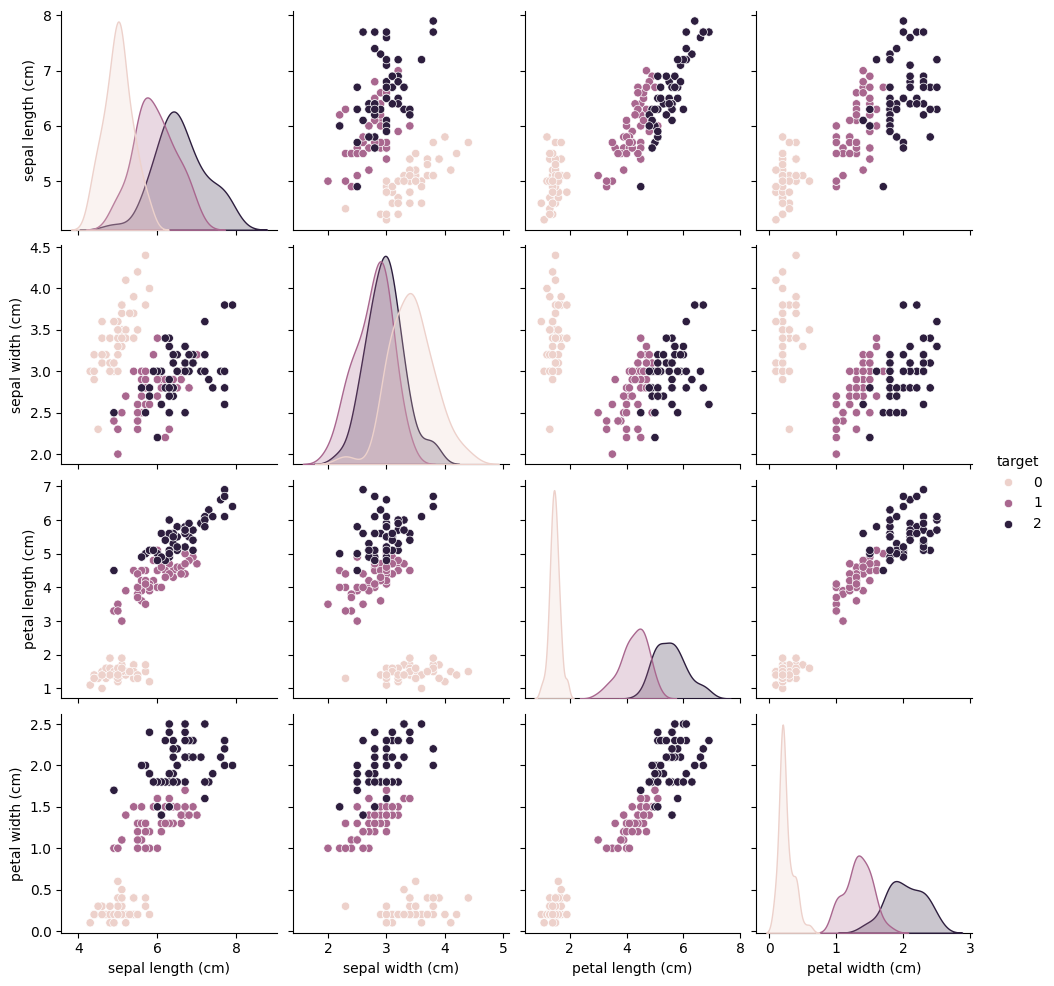

In [13]:
# Pairplot to show relationships of the dataset
sns.pairplot(df, hue='target')
plt.show()

Section 2: Detailed Data Exploration

In [15]:
# Check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

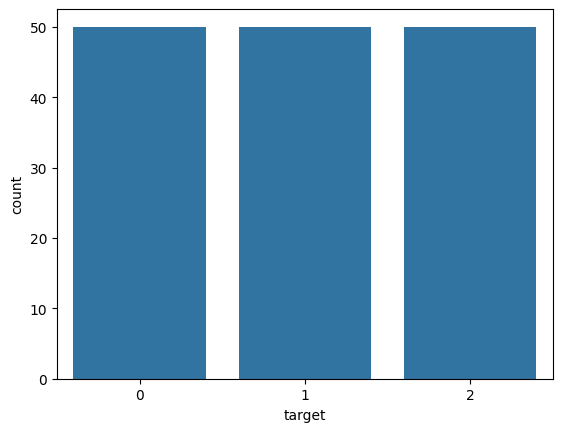

In [17]:
# Check the distribution of the target column. In this case, we have equal distribution among the three possibilities
sns.countplot(data=df, x='target')
plt.show()

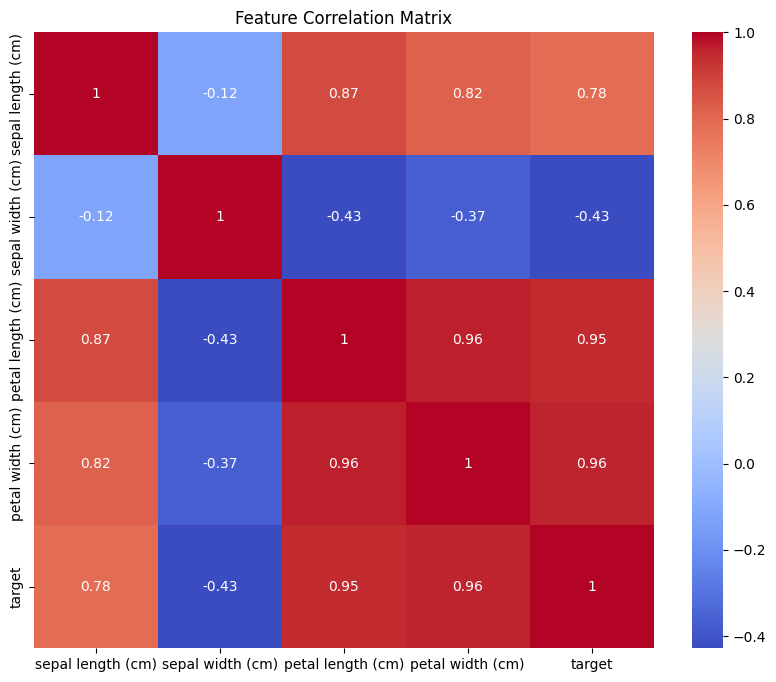

In [19]:
# Correlation Map of the Features 
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

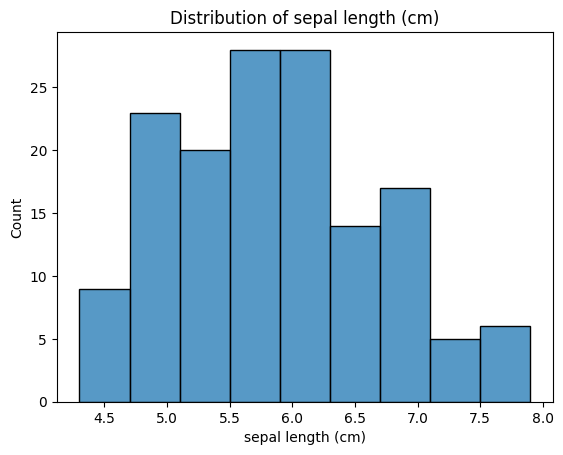

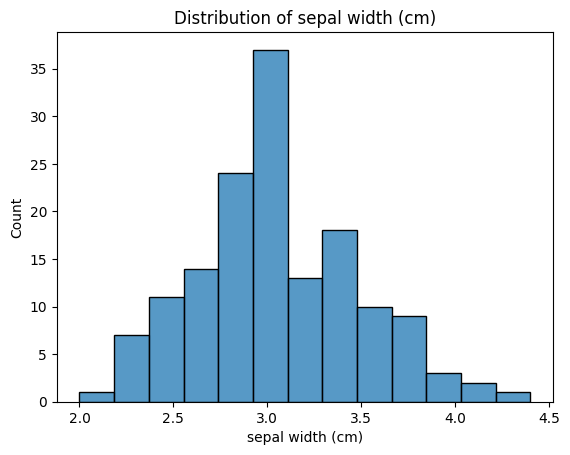

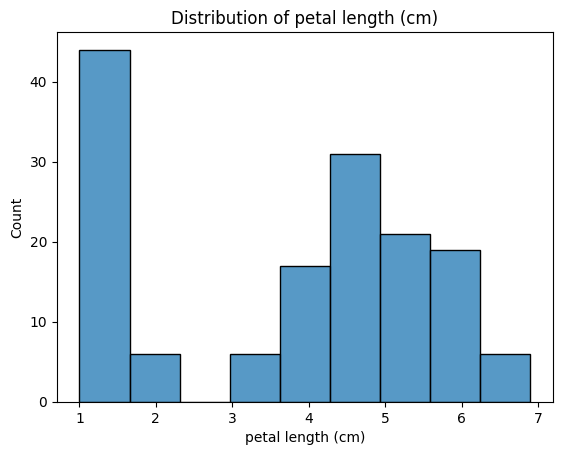

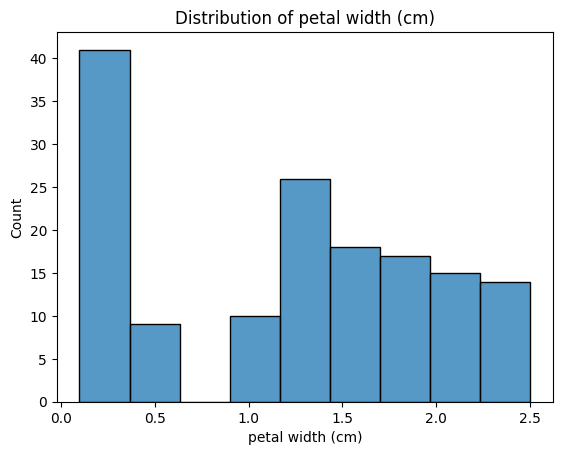

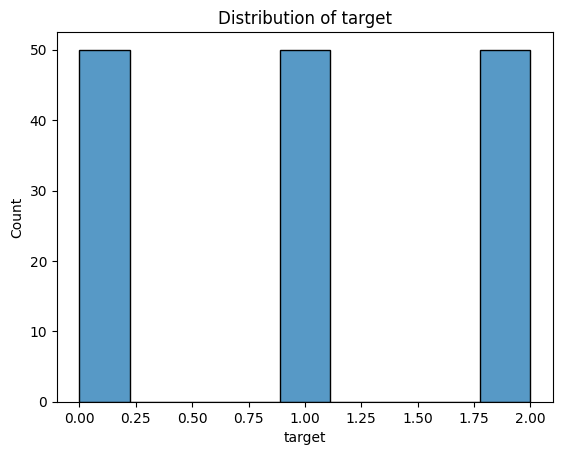

In [26]:
# Make a bar chart for each feature to see how it is distributed
for col in df.columns:
    sns.histplot(df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

Section 3: Data Preprocessing and Splitting

In [28]:
# Setup Train Test Split
from sklearn.model_selection import train_test_split

In [29]:
# Define Features anf target
X = df.drop('target', axis=1)
y = df['target']

In [31]:
# Split the data into training and testing splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
# test_size = .2 means 20% of the data will be used for testing
# random_state = 42 just ensures reproducibility by fixing the randomness for consistent splits

In [33]:
# Import package for Scaling data
from sklearn.preprocessing import StandardScaler
#Initialize Scaler
scaler = StandardScaler()
#Fit and transform the scaler on training and testing data for features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Section 4: Model Training and Evaluation

In [34]:
# Import 1st model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

In [37]:
# Initialize and fit the model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
# Make Predictions
y_pred = log_reg_model.predict(X_test_scaled)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



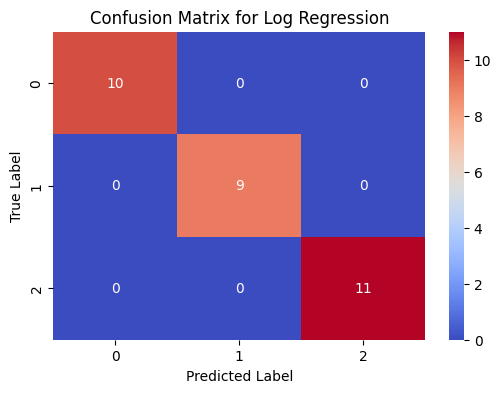

In [40]:
# Evaluate Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

# Print Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Display Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='g')
plt.title('Confusion Matrix for Log Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()